In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # ou DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report

In [10]:
import matplotlib.pyplot as plt

# ###################################
# Chargement des datas
# ###################################
df = pd.read_csv('./data/etudes-superieurs.csv',sep=';',  dtype={0: str})


# Nettoyage des noms de colonnes : suppression des tabulations, espaces, apostrophes
df.columns = (
    df.columns
    .str.strip()
    .str.replace('\t', '', regex=False)
    .str.replace(' ', '_')
    .str.replace("'", "")
)

# Affichage des noms nettoyés pour vérification
print(df.columns.tolist())
df.head()  # Print the first rows of the dataframe

['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime/evening_attendance', 'Previous_qualification', 'Previous_qualification_(grade)', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_(credited)', 'Curricular_units_1st_sem_(enrolled)', 'Curricular_units_1st_sem_(evaluations)', 'Curricular_units_1st_sem_(approved)', 'Curricular_units_1st_sem_(grade)', 'Curricular_units_1st_sem_(without_evaluations)', 'Curricular_units_2nd_sem_(credited)', 'Curricular_units_2nd_sem_(enrolled)', 'Curricular_units_2nd_sem_(evaluations)', 'Curricular_units_2nd_sem_(approved)', 'Curricular_units_2nd_sem_(grade)', 'Curricular_units_2nd_sem_(without_evaluations)', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target']


,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Previous_qualification_(grade),Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [11]:
dataEtudeSup.info()

NameError: name 'dataEtudeSup' is not defined

In [ ]:
dataEtudeSup.describe()

,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
print(dataEtudeSup.columns.tolist())

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


In [14]:
# ------------------------------------------------------------
# Définition du label socio-économique 
# ------------------------------------------------------------

def define_dropout_redef(row):
    low_edu_parents = (row['Mothers_qualification'] <= 2) and (row['Fathers_qualification'] <= 2)
    financial_struggle = (row['Scholarship_holder'] == 1) and (row['Tuition_fees_up_to_date'] == 0)
    is_debtor = row['Debtor'] == 1
    is_displaced_and_old = (row['Displaced'] == 1) and (row['Age_at_enrollment'] > 22)
    risk_score = sum([low_edu_parents, financial_struggle, is_debtor, is_displaced_and_old])
    return 1 if risk_score >= 2 else 0

df['Dropout_redef'] = df.apply(define_dropout_redef, axis=1)



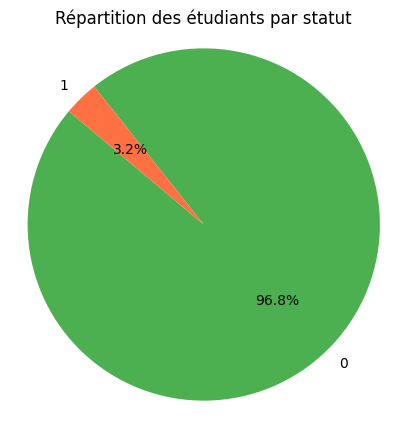

In [15]:
target_counts = df['Dropout_redef'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    target_counts, 
    labels=target_counts.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=['#4CAF50', '#FF7043', '#42A5F5']  # couleurs optionnelles
)

plt.title("Répartition des étudiants par statut")
plt.axis('equal')  # Pour un cercle parfait
import plotly.graph_objects as go
plt.show()

In [16]:
comparaison = pd.crosstab(df['Target'], df['Dropout_redef'], rownames=['Target'], colnames=['Dropout_redef'])
print(comparaison)

Dropout_redef     0   1
Target                 
Dropout        1329  92
Enrolled        772  22
Graduate       2181  28


In [ ]:

#------------------------------------------------------------
#  Sélection des variables explicables
# ------------------------------------------------------------

features = [
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Scholarship_holder',
    'Tuition_fees_up_to_date',
    'Debtor',
    'Displaced',
    'Age_at_enrollment',
    'Daytime/evening_attendance',
    'International'
]

X = df[features]
y = df['Dropout_redef']

In [ ]:
# ------------------------------------------------------------
# Séparation train/test avec stratification
# ------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)


In [ ]:
# ------------------------------------------------------------
# Entraînement d’un arbre de décision explicable
# ------------------------------------------------------------

model = DecisionTreeClassifier(
    max_depth=5,                # Arbre peu profond = explicable
    min_samples_leaf=10,        # Évite les décisions sur très petits groupes
    class_weight='balanced',    # Compense le fort déséquilibre de classe
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=10, random_state=42)

Accuracy: 0.9864457831325302
=== Rapport de classification ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1285
           1       0.72      0.95      0.82        43

    accuracy                           0.99      1328
   macro avg       0.86      0.97      0.91      1328
weighted avg       0.99      0.99      0.99      1328



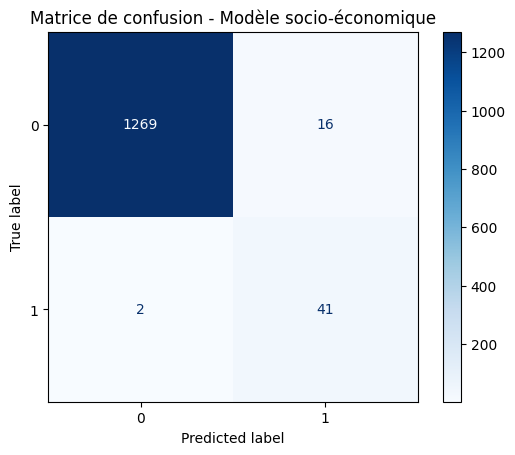

In [ ]:
# ------------------------------------------------------------
# Évaluation du modèle
# ------------------------------------------------------------

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

#Matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Modèle socio-économique")
plt.show()
#Visualisation claire des vrais positifs / faux positifs.

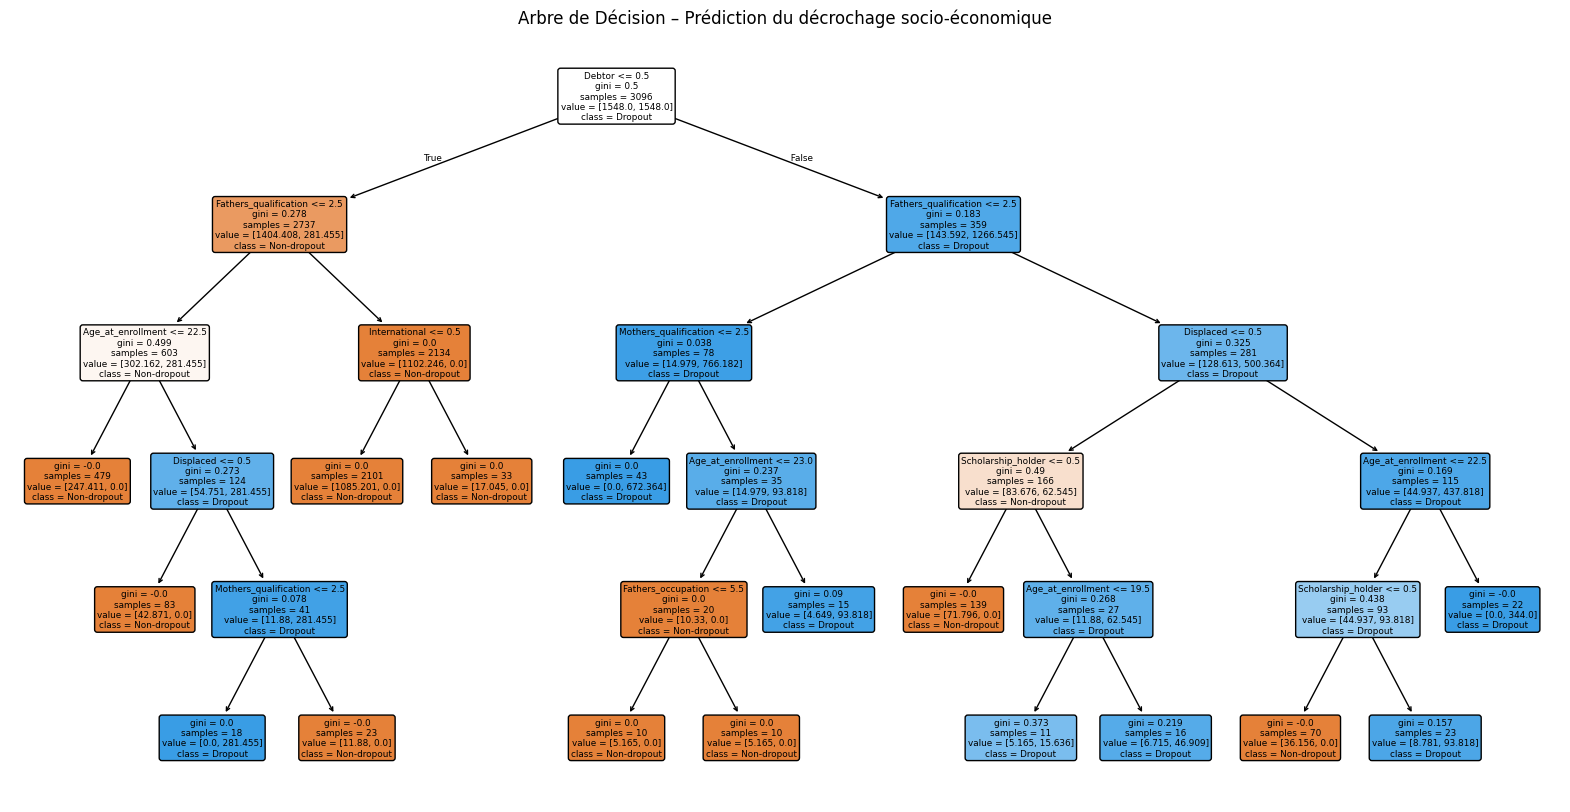

In [ ]:
# ------------------------------------------------------------
# Visualisation de l’arbre
# ------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Non-dropout', 'Dropout'],
    filled=True,
    rounded=True
)
plt.title("Arbre de Décision – Prédiction du décrochage socio-économique")
plt.show()

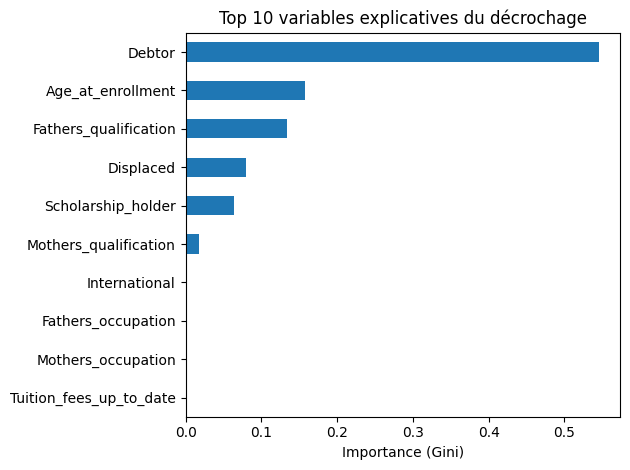

In [ ]:

# ------------------------------------------------------------
#Analyse des variables importantes
# ------------------------------------------------------------

import matplotlib.pyplot as plt

# Récupération de l’importance des variables
importances = model.feature_importances_

# Associer les importances aux noms de colonnes
features = pd.Series(importances, index=X.columns)

# Affichage des 10 variables les plus importantes
features.sort_values(ascending=False).head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 variables explicatives du décrochage')
plt.xlabel("Importance (Gini)")
plt.tight_layout()
plt.show()
